In [0]:
# Load Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

In [0]:
#load dataset
athlete = spark.read.csv('dbfs:/FileStore/PortfolioProject/athlete_events.csv',header=True,inferSchema=True)
region = spark.read.csv('dbfs:/FileStore/PortfolioProject/noc_regions.csv',header=True,inferSchema=True)

In [0]:
athlete.show()

+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|       City|               Sport|               Event|Medal|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
|  1|           A Dijiang|  M| 24|   180|    80|         China|CHN|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...|   NA|
|  2|            A Lamusi|  M| 23|   170|    60|         China|CHN|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...|   NA|
|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...|   NA|
|  4|Edgar Lindenau Aabye|  M| 34|    NA|    NA|Denmark/Sweden|DEN|1900 Summer|1900|Summ

In [0]:
region.show()

+---+--------------+--------------------+
|NOC|        region|               notes|
+---+--------------+--------------------+
|AFG|   Afghanistan|                null|
|AHO|       Curacao|Netherlands Antilles|
|ALB|       Albania|                null|
|ALG|       Algeria|                null|
|AND|       Andorra|                null|
|ANG|        Angola|                null|
|ANT|       Antigua| Antigua and Barbuda|
|ANZ|     Australia|         Australasia|
|ARG|     Argentina|                null|
|ARM|       Armenia|                null|
|ARU|         Aruba|                null|
|ASA|American Samoa|                null|
|AUS|     Australia|                null|
|AUT|       Austria|                null|
|AZE|    Azerbaijan|                null|
|BAH|       Bahamas|                null|
|BAN|    Bangladesh|                null|
|BAR|      Barbados|                null|
|BDI|       Burundi|                null|
|BEL|       Belgium|                null|
+---+--------------+--------------

In [0]:
#Join Dataframes
df = athlete.join(region,on=['noc'],how='left')
df.show()

+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+-----------+--------------------+--------------------+-----+-----------+-----+
|NOC| ID|                Name|Sex|Age|Height|Weight|          Team|      Games|Year|Season|       City|               Sport|               Event|Medal|     region|notes|
+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+-----------+--------------------+--------------------+-----+-----------+-----+
|CHN|  1|           A Dijiang|  M| 24|   180|    80|         China|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...|   NA|      China| null|
|CHN|  2|            A Lamusi|  M| 23|   170|    60|         China|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...|   NA|      China| null|
|DEN|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...|   NA

In [0]:
#Rename_Coulmns
df = df.withColumnRenamed('region','Region')
df = df.withColumnRenamed('notes','Notes')
df = df.filter((df['Sex'] == 'M') | (df['Sex'] == 'F'))
df.show()

+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+-----------+--------------------+--------------------+-----+-----------+-----+
|NOC| ID|                Name|Sex|Age|Height|Weight|          Team|      Games|Year|Season|       City|               Sport|               Event|Medal|     Region|Notes|
+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+-----------+--------------------+--------------------+-----+-----------+-----+
|CHN|  1|           A Dijiang|  M| 24|   180|    80|         China|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...|   NA|      China| null|
|CHN|  2|            A Lamusi|  M| 23|   170|    60|         China|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...|   NA|      China| null|
|DEN|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...|   NA

In [0]:
df.printSchema()

root
 |-- NOC: string (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Notes: string (nullable = true)



In [0]:

df = df.withColumn('Age', col('Age').cast(IntegerType()))
df = df.withColumn('Height', col('Height').cast(IntegerType()))
df = df.withColumn('Weight', col('Weight').cast(IntegerType()))
df = df.withColumn('Year', col('Year').cast(IntegerType()))

In [0]:
df.describe().show()

+-------+------+-----------------+--------------------+------+-----------------+------------------+------------------+--------------------+-----------+------------------+------+-----------+-----------+--------------------+------+-----------+-------------------+
|summary|   NOC|               ID|                Name|   Sex|              Age|            Height|            Weight|                Team|      Games|              Year|Season|       City|      Sport|               Event| Medal|     Region|              Notes|
+-------+------+-----------------+--------------------+------+-----------------+------------------+------------------+--------------------+-----------+------------------+------+-----------+-----------+--------------------+------+-----------+-------------------+
|  count|270443|           270443|              270443|270443|           260971|            210446|            207759|              270443|     270443|            270443|270443|     270443|     270443|             

In [0]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

Out[176]: {'NOC': 0,
 'ID': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 9472,
 'Height': 59997,
 'Weight': 62684,
 'Team': 0,
 'Games': 0,
 'Year': 0,
 'Season': 0,
 'City': 0,
 'Sport': 0,
 'Event': 0,
 'Medal': 0,
 'Region': 349,
 'Notes': 265407}

In [0]:
#India_Details
df.filter("Team == 'India'").show()

+---+----+--------------------+---+----+------+------+-----+-----------+----+------+--------------+-------------+--------------------+-----+------+-----+
|NOC|  ID|                Name|Sex| Age|Height|Weight| Team|      Games|Year|Season|          City|        Sport|               Event|Medal|Region|Notes|
+---+----+--------------------+---+----+------+------+-----+-----------+----+------+--------------+-------------+--------------------+-----+------+-----+
|IND| 281|      S. Abdul Hamid|  M|null|  null|  null|India|1928 Summer|1928|Summer|     Amsterdam|    Athletics|Athletics Men's 1...|   NA| India| null|
|IND| 281|      S. Abdul Hamid|  M|null|  null|  null|India|1928 Summer|1928|Summer|     Amsterdam|    Athletics|Athletics Men's 4...|   NA| India| null|
|IND| 512|Shiny Kurisingal ...|  F|  19|   167|    53|India|1984 Summer|1984|Summer|   Los Angeles|    Athletics|Athletics Women's...|   NA| India| null|
|IND| 512|Shiny Kurisingal ...|  F|  19|   167|    53|India|1984 Summer|1984

In [0]:
#Top Country Participating
from pyspark.sql.functions import col
top_20_countries = df.groupBy("Team").count().sort(col("count").desc()).limit(20)
top_20_countries.show()

+-------------+-----+
|         Team|count|
+-------------+-----+
|United States|17372|
|       France|11983|
|Great Britain|11389|
|        Italy|10260|
|      Germany| 9303|
|       Canada| 9246|
|        Japan| 8289|
|       Sweden| 8045|
|    Australia| 7504|
|      Hungary| 6547|
|       Poland| 6143|
|  Switzerland| 5844|
|  Netherlands| 5705|
| Soviet Union| 5535|
|      Finland| 5379|
|        Spain| 5222|
|        China| 4975|
|       Russia| 4921|
|      Austria| 4860|
|       Norway| 4708|
+-------------+-----+



In [0]:
pandas_top_20 = top_20_countries.toPandas()

Out[180]: <AxesSubplot:title={'center':'Overall Participation by Country'}, xlabel='Team', ylabel='count'>

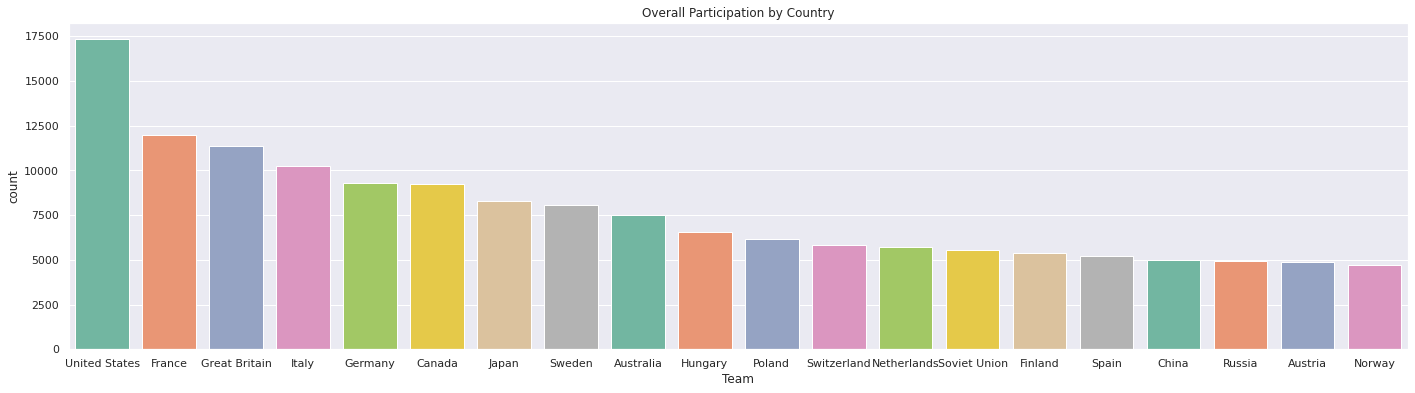

In [0]:
#plot_for_top_20_countries

plt.figure(figsize=(24,6))
plt.title('Overall Participation by Country')
sns.barplot(x = pandas_top_20['Team'],y = pandas_top_20['count'],palette = 'Set2')

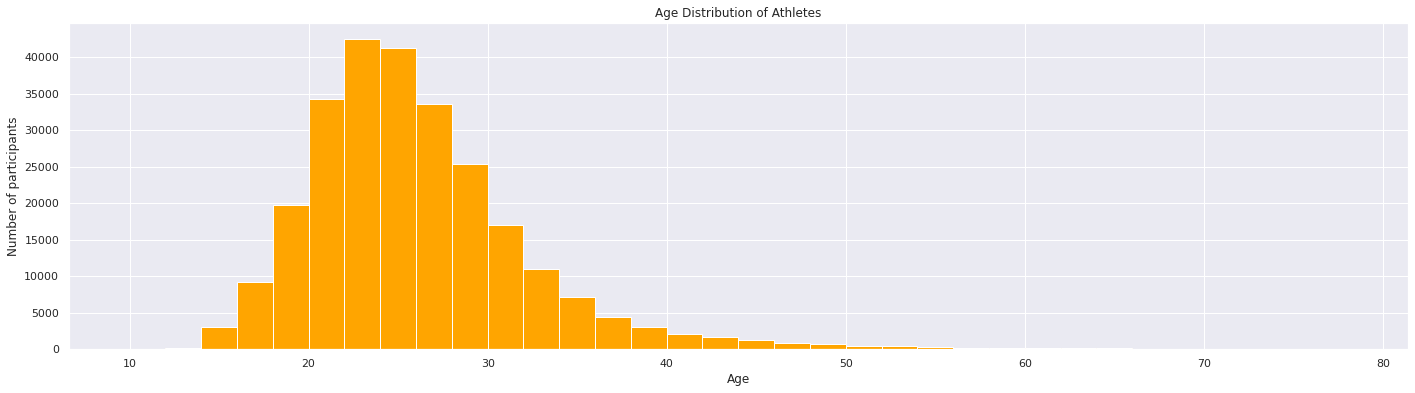

In [0]:
df1 = spark.read.option('header',True).option('mode','dropmalformed').csv('dbfs:/FileStore/PortfolioProject/athlete_events.csv') #badRecords

df1 = df1.withColumn('Age', df1['Age'].cast(IntegerType()))   #converting age(string) into age(int)

av = df1.groupBy('Age').mean()
df1 = df1.replace('NA','av')   #Replacing NA value by mean of age

pandas_df = df1.toPandas()     # matplot to work in pyspark notebook, convert sparkDataFrame into PandasDataFrame
# Create the age distribution histogram
plt.figure(figsize=(24, 6))
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(pandas_df['Age'], bins= np.arange(10, 80, 2),color='orange',edgecolor='white')
plt.show()

In [0]:
#Winter Olympic Sports

winter_sports = athlete.filter(athlete['Season']=='Winter').select(athlete['Sport']).distinct()
winter_sports.show()

+--------------------+
|               Sport|
+--------------------+
|          Ice Hockey|
|       Alpine Skiing|
|            Biathlon|
|            Alpinism|
|      Figure Skating|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|       Speed Skating|
|        Snowboarding|
|           Bobsleigh|
|Cross Country Skiing|
|Short Track Speed...|
|             Curling|
| Military Ski Patrol|
|    Freestyle Skiing|
|                Luge|
+--------------------+



In [0]:
#Winter Olympic Sports

summer_sports = athlete.filter(athlete['Season']=='Summer').select(athlete['Sport']).distinct()
summer_sports.show()

+-------------+
|        Sport|
+-------------+
|   Gymnastics|
|       Boxing|
|       Rowing|
|         Judo|
|      Sailing|
|     Swimming|
|   Basketball|
|     Handball|
|Equestrianism|
|    Badminton|
|    Athletics|
|     Shooting|
|    Wrestling|
|    Taekwondo|
|   Water Polo|
|Weightlifting|
|   Tug-Of-War|
|      Fencing|
|       Hockey|
|     Football|
+-------------+
only showing top 20 rows



In [0]:
#Male and Female Participants
filtered_df = df.filter((df['Sex'] == 'M') | (df['Sex'] == 'F'))
gender_count = filtered_df.groupBy(filtered_df['Sex']).count()
gender_count.show()

+---+------+
|Sex| count|
+---+------+
|  F| 74357|
|  M|196086|
+---+------+



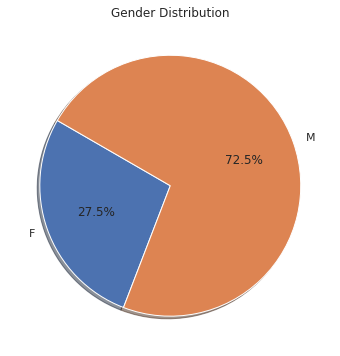

In [0]:
#Pie plot for male and female athletes

gender_count = gender_count.withColumn('count', gender_count['count'].cast('int'))

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = gender_count.toPandas()

plt.figure(figsize=(24, 6))
plt.title('Gender Distribution')
plt.pie(pandas_df['count'], labels=pandas_df['Sex'], autopct='%1.1f%%', startangle=150, shadow=True)
plt.show()

In [0]:
# Total number of female athletes in each olympics

e_part = df.filter((df['Sex'] == 'F') & (df['Season'] == 'Summer'))
e_part = e_part.groupBy(e_part['Year']).count().orderBy(col('Year'))
e_part.show()

+----+-----+
|Year|count|
+----+-----+
|1900|   32|
|1904|   16|
|1906|   11|
|1908|   47|
|1912|   87|
|1920|  133|
|1924|  243|
|1928|  401|
|1932|  337|
|1936|  459|
|1948|  624|
|1952| 1484|
|1956|  891|
|1960| 1422|
|1964| 1336|
|1968| 1767|
|1972| 2179|
|1976| 2164|
|1980| 1755|
|1984| 2442|
+----+-----+
only showing top 20 rows



Out[187]: Text(0.5, 1.0, 'Women Participation')

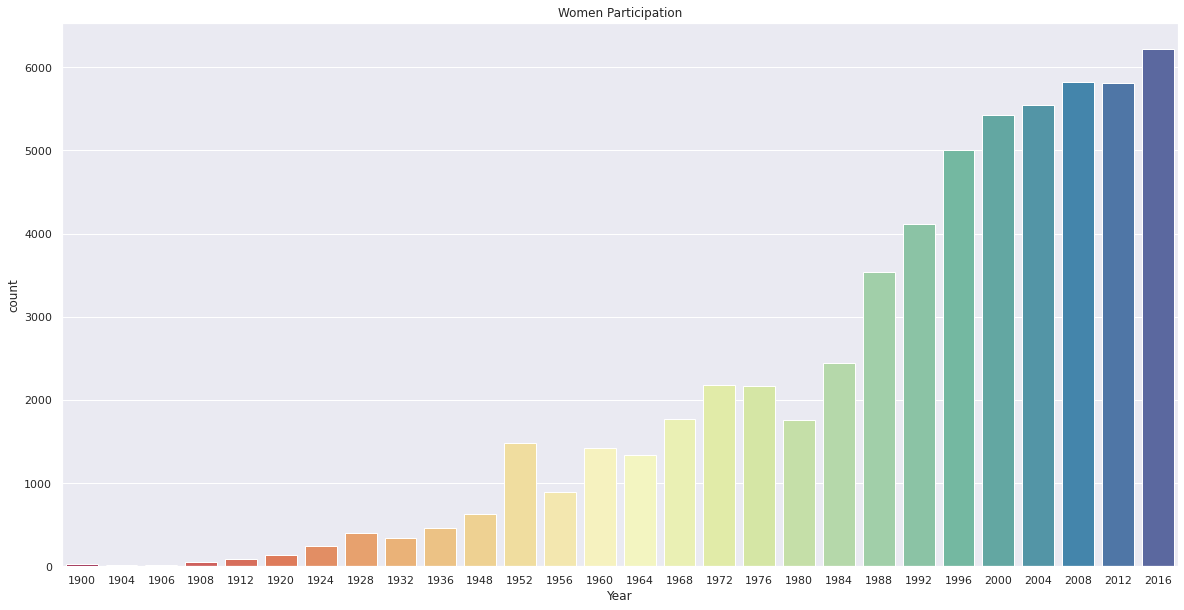

In [0]:
women_oly =  df.filter((df['Sex'] == 'F') & (df['Season'] == 'Summer')).orderBy(df['Year'])

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=women_oly.toPandas(), palette='Spectral')
plt.title('Women Participation')

In [0]:
# Gold medal athletes
gold_medal = df.filter(df['Medal']=="Gold")
gold_medal.show()

+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+--------------+-------------+--------------------+-----+--------+-----+
|NOC| ID|                Name|Sex|Age|Height|Weight|          Team|      Games|Year|Season|          City|        Sport|               Event|Medal|  Region|Notes|
+---+---+--------------------+---+---+------+------+--------------+-----------+----+------+--------------+-------------+--------------------+-----+--------+-----+
|DEN|  4|Edgar Lindenau Aabye|  M| 34|  null|  null|Denmark/Sweden|1900 Summer|1900|Summer|         Paris|   Tug-Of-War|Tug-Of-War Men's ...| Gold| Denmark| null|
|FIN| 17|Paavo Johannes Aa...|  M| 28|   175|    64|       Finland|1948 Summer|1948|Summer|        London|   Gymnastics|Gymnastics Men's ...| Gold| Finland| null|
|FIN| 17|Paavo Johannes Aa...|  M| 28|   175|    64|       Finland|1948 Summer|1948|Summer|        London|   Gymnastics|Gymnastics Men's ...| Gold| Finland| null|
|FIN| 17|Paavo Johanne

In [0]:
df = df.withColumn('Age', col('Age').cast(IntegerType()))

# Filter for rows where the 'Medal' is 'Gold' or the 'Age' is greater than 60
gold_medal = df.filter((df['Medal'] == 'Gold') & (df['Age'] > 60) ).select(['ID','Sport'])

gold_medal.show()

+------+----------------+
|    ID|           Sport|
+------+----------------+
| 52626|Art Competitions|
| 53238|           Roque|
| 95906|         Archery|
|113773|         Archery|
|117046|        Shooting|
|130662|         Archery|
+------+----------------+



Out[190]: Text(0.5, 1.0, 'Gold Medal for Athletes over 60 years')

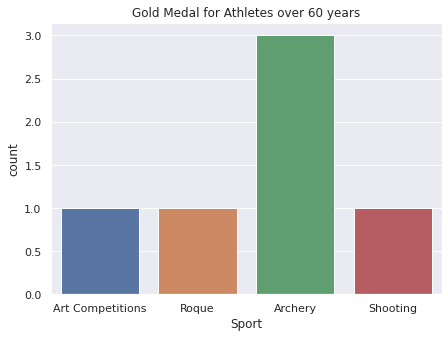

In [0]:
#plot for Sport Event

plt.figure(figsize=(7,5))
plt.tight_layout
sns.countplot(x = 'Sport', data = gold_medal.toPandas())
plt.title('Gold Medal for Athletes over 60 years')

In [0]:
# Gold Medal for each country

gold_country = df.filter(df['Medal'] == 'Gold').groupBy('Region').count().orderBy(col('count').desc()).limit(5).toPandas()
gold_country

,Region,count
0,USA,2535
1,Russia,1597
2,Germany,1300
3,UK,677
4,Italy,575


Out[192]: Text(0.5, 1.0, 'Gold Medal per Country')

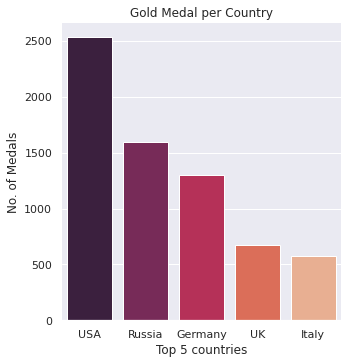

In [0]:
g = sns.catplot(x='Region', y='count', data=gold_country, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('No. of Medals')
plt.title('Gold Medal per Country')


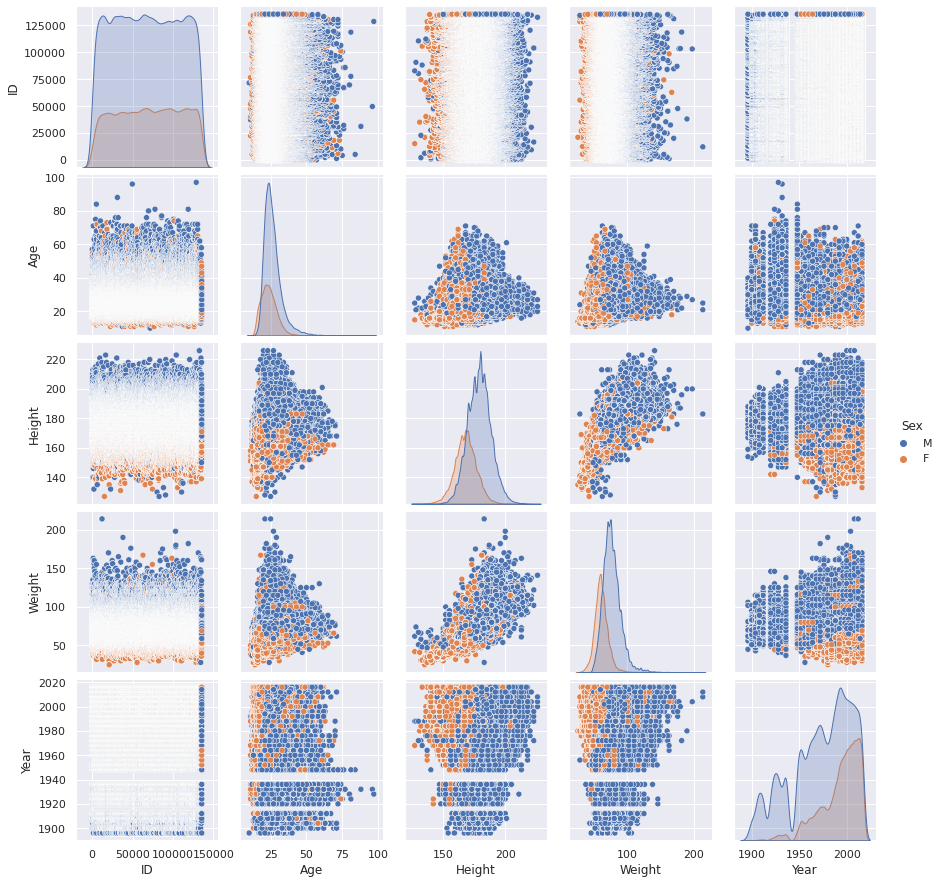

In [0]:
sns.pairplot(data = df.toPandas(),hue='Sex')
plt.grid()
plt.show()